In [ ]:
#url for requesting api
#https://www.themoviedb.org/settings/api

#Libraries

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm,tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Getting the Tabular Data of films from Wikipedia
def tabular_data_extract(start_year,end_year,link):
  data_dt={}
  for year in tqdm(range(start_year,end_year)):
    link_full = link+str(year)
    temp_lst=[]
    try:
      for table_num in range(27):
        df = pd.read_html(link_full, header=0)[table_num]
        if df.shape[0]>12 and df.shape[1]>3:
          try:
            df['Title']
          except:
            if 'Titlesindoor' in list(df.columns):
              df.rename({'Titlesindoor':'Title'},axis=1,inplace=True)
            else:
              break
          try:
            df['Director']
          except: 
            df['Director']=['unknown' for i in range(df.shape[0])]
          try:
            df['Cast']
          except:
            if 'Cast and crew' in list(df.columns):
              df.rename({'Cast and crew':'Cast'},axis=1,inplace=True)
            else:
              df['Cast']=['unknown' for i in range(df.shape[0])]
          try:
            df['Genre']
          except:
            df['Genre']=['unknown' for i in range(df.shape[0])]  
          #print(df)
          temp_lst.append(df.to_dict())
    except:
      pass
    data_dt[year]=temp_lst
  return data_dt

In [3]:
#Creating a function to seperate data from dictionary
def seperating_data(stat_year,end_year,data_dt):
  Title_lst=[]
  Director_lst=[]
  Cast_lst=[]
  Genre_lst=[]
  Year_lst=[]

  for year in tqdm(range(stat_year,end_year)):
    temp_Title_lst=[]
    for movie in data_dt[year]:
      Title_lst.extend(list(movie['Title'].values()))
      temp_Title_lst.extend(list(movie['Title'].values()))
      Director_lst.extend(list(movie['Director'].values()))
      Cast_lst.extend(list(movie['Cast'].values()))
      Genre_lst.extend(list(movie['Genre'].values()))
    Year_lst.extend([year for i in range(len(temp_Title_lst))])

  return Title_lst,Director_lst,Cast_lst,Genre_lst,Year_lst


In [ ]:
#Getting the Tabular Data of Hollywood films from Wikipedia
start_year=1910
end_year=2021
link="https://en.wikipedia.org/wiki/List_of_American_films_of_"
hollywood_dt=tabular_data_extract(start_year,end_year,link)

##Creating dataframe from Hollywood data
start_year=1910
end_year=2021
Title_lst,Director_lst,Cast_lst,Genre_lst,Year_lst=seperating_data(start_year,end_year,hollywood_dt)
hollywood_movie_dt={'Title':Title_lst,'Director':Director_lst,'Cast':Cast_lst,'Genre':Genre_lst,'Year':Year_lst}
hollywood_movie_df=pd.DataFrame(hollywood_movie_dt)
hollywood_movie_df.to_csv('hollywood_movie_df.csv',index=False)
print(hollywood_movie_df.shape)
hollywood_movie_df.head()

100%|██████████| 111/111 [13:14<00:00,  7.16s/it]


In [ ]:
#Getting the Tabular Data of Bollywood films from Wikipedia
start_year=1930
end_year=2021
link="https://en.wikipedia.org/wiki/List_of_Bollywood_films_of_"
bollywood_dt=tabular_data_extract(start_year,end_year,link)

##Creating dataframe from Bollywood data
start_year=1930
end_year=2021
Title_lst,Director_lst,Cast_lst,Genre_lst,Year_lst=seperating_data(start_year,end_year,bollywood_dt)
bollywood_movie_dt={'Title':Title_lst,'Director':Director_lst,'Cast':Cast_lst,'Genre':Genre_lst,'Year':Year_lst}
bollywood_movie_df=pd.DataFrame(bollywood_movie_dt)
bollywood_movie_df=bollywood_movie_df[bollywood_movie_df['Title']!=np.NaN]
bollywood_movie_df.to_csv('bollywood_movie_df.csv',index=False)
print(bollywood_movie_df.shape)
bollywood_movie_df.head()

In [ ]:
#Getting the Tabular Data of Tollywood films from Wikipedia
start_year=1940
end_year=2021
link=""https://en.wikipedia.org/wiki/List_of_Telugu_films_of_""
tollywood_dt=tabular_data_extract(start_year,end_year,link)

#Creating dataframe from Tollywood data
start_year=1940
end_year=2021
Title_lst,Director_lst,Cast_lst,Genre_lst,Year_lst=seperating_data(start_year,end_year,tollywood_dt)
tollywood_movies_dt={'Title':Title_lst,'Director':Director_lst,'Cast':Cast_lst,'Genre':Genre_lst,'Year':Year_lst}
tollywood_movies_df=pd.DataFrame(tollywood_movies_dt)
tollywood_movie_df=tollywood_movie_df[tollywood_movie_df['Title']!=np.NaN]
tollywood_movie_df.to_csv('tollywood_movie_df.csv',index=False)
print(tollywood_movies_df.shape)
tollywood_movies_df.head(5)

In [2]:
#Function for extracting genre of films using api key
#!pip install tmdbv3api
import sys
from tmdbv3api import TMDb
from tmdbv3api import Movie
import json
import requests
tmdb = TMDb()
tmdb.api_key = ''
tmdb_movie = Movie()

def get_genre(movie_name,year,lang):
  movies_lst=tmdb_movie.search(movie_name)
  if len(movies_lst)>0:
    for i in movies_lst:
      movie_id=i.id
      response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
      data_json=response.json()
      #print(type(data_json['release_date'].split('-')[0]))
      #print(data_json['original_language'])
      try:
        if data_json['release_date'].split('-')[0]==str(year) and data_json['original_language']==lang:
          final_genre=""
          #print(data_json)
          for i in range(10):
            try:
              final_genre+=data_json['genres'][i]['name']+" "
            except:
              break
          final_genre=final_genre.strip()
          break    
        else:
          final_genre='unknown'

      except:
        #print(sys.exc_info()[0])
        final_genre='unknown'
  else:
    final_genre='unknown'

  return final_genre

In [3]:
#funcion to get the genre for each row with unknown Genre.
def genre_lst(title_lst,year_lst,old_genre_lst,lang):
  Genre_final_lst=[]
  for movie_name,year,genre in tqdm(zip(title_lst,year_lst,old_genre_lst)):
    if genre=='unknown':
      #print('not there',title_lst)
      try:
        genre_lst=get_genre(movie_name,year,lang)
      except:
        print(movie_name,year,genre)
        break
      if len(genre_lst)>0:
        Genre_final_lst.append(genre_lst)
      else:
        Genre_final_lst.append('Unknown')
    else:
      Genre_final_lst.append(genre)

  return Genre_final_lst

In [ ]:
hollywood_movie_df[hollywood_movie_df['Year']==2016][30:60]

In [7]:
for i in title_lst:
  if i=='nan':
    print(i)

In [4]:
#Getting Genre of Hollywood movies
hollywood_movie_df=pd.read_csv('/content/hollywood_movie_df.csv')
hollywood_movie_df=hollywood_movie_df.dropna()
title_lst=hollywood_movie_df['Title'].values
year_lst=hollywood_movie_df['Year'].values
old_genre_lst=hollywood_movie_df['Genre'].values
lang='en'

Genre_final_lst=genre_lst(title_lst,year_lst,old_genre_lst,lang)

hollywood_movie_df['new_Genre']=Genre_final_lst
hollywood_movie_df.to_csv('hollywood_movie_df2.csv',index=False)
hollywood_movie_df.head()


30465it [10:03, 50.48it/s]


,Title,Director,Cast,Genre,Year,new_Genre
1,An Arcadian Maid,D. W. Griffith,"Mary Pickford, Mack Sennett",Drama,1910,Drama
2,As It Is In Life,D. W. Griffith,"George Nichols, Gladys Egan, Mary Pickford",Romantic drama,1910,Romantic drama
4,The Courtship of Miles Standish,Hobart Bosworth,Robert Z. Leonard,Drama,1910,Drama
5,The Englishman and the Girl,D. W. Griffith,"Charles Craig, Mary Pickford",Comedy,1910,Comedy
7,The Fugitive,D. W. Griffith,"Kate Bruce, Edward Dillon",Drama,1910,Drama


In [5]:
#Getting Genre of Bollywood movies
bollywood_movie_df=pd.read_csv('/content/bollywood_movie_df.csv')
bollywood_movie_df=bollywood_movie_df.dropna()

title_lst=bollywood_movie_df['Title'].values
year_lst=bollywood_movie_df['Year'].values
old_genre_lst=bollywood_movie_df['Genre'].values
lang='hi'

Genre_final_lst=genre_lst(title_lst,year_lst,old_genre_lst,lang)

bollywood_movie_df['new_Genre']=Genre_final_lst
bollywood_movie_df.to_csv('bollywood_movie_df2.csv',index=False)
bollywood_movie_df.head()


6572it [05:17, 20.69it/s]


,Title,Director,Cast,Genre,Year,new_Genre
0,A Prince Indeed a.k.a. Veer Bhushan,Keshavlal Joshi,"Laxmi, Bachchu, Suleman Master, Drupad Bhatt",Costume,1930,Costume
1,Ace Of Swords a.k.a. Talwar Ka Phani,Harshad Mehta,"Mumtaz, Ata Mohammed, Jani Babu, Nizam",Costume,1930,Costume
2,Alik Babu a.k.a. Master Liar,Dhiren Ganguly,"Dhiren Ganguly, Radha Rani, D. R. Das, Kalipad...",Social,1930,Social
6,Arunodaya a.k.a. The Rising Sun (Dawn),Bhagwati Mishra,"Master Vithal, Nirasha, Yakub, Boman Irani, Wa...",Costume,1930,Costume
8,Avenged a.k.a. Ver Vasul,M. Udwadia,"Shahzadi, Udwadia, Malka",Costume,1930,Costume


In [24]:
#Getting Genre of Tollywood movies
tollywood_movie_df=pd.read_csv('/content/tollywood_movie_df.csv')
tollywood_movie_df=tollywood_movie_df.dropna()

title_lst=tollywood_movie_df['Title'].values
year_lst=tollywood_movie_df['Year'].values
old_genre_lst=tollywood_movie_df['Genre'].values
lang='te'

Genre_final_lst=genre_lst(title_lst,year_lst,old_genre_lst,lang)
tollywood_movie_df['new_Genre']=Genre_final_lst
tollywood_movie_df.to_csv('tollywood_movie_df2.csv',index=False)
tollywood_movie_df.head()


2767it [11:23,  4.05it/s]


,Title,Director,Cast,Genre,Year,new_Genre
0,Barrister Parvateesarrn,H. M. Reddy,"Lanka Satyam, G. Varalakshmi, K. Sivarao, L. V...",Comedy,1940,Comedy
1,Bhoja Kalidasu,H. V. Babu,"Adhanki Srirama Murthy, Parepalli Subba Rao, P...",Mythology,1940,Mythology
2,Bhookailas,Sundar Rao Nadkarni,"M. V. Subbiah Naidu, R. Nagendra Rao, Lakshmi ...",Devotional,1940,Devotional
3,Bondam Pelli,H. M. Reddy,"L. V. Prasad, G. Varalakshmi",Comedy,1940,Comedy
4,Chaduvukunna Bharya,H. M. Reddy,"Lanka Satyam, G. Varalakshmi",Comedy,1940,Comedy


In [ ]:
#get_genre('Taxiwala',2018,'te')
#tmdb_movie.search('Taxiwaala')[0].id
#response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(tmdb_movie.search('Taxiwaala')[0].id,tmdb.api_key))
#data_json=response.json()
#data_json
#hollywood_movie_df[hollywood_movie_df['Genre']=='unknown'].tail()
#tollywood_movie_df[tollywood_movie_df['Genre']=='unknown'][800:]
#bollywood_movie_df[bollywood_movie_df['new_Genre']=='unknown'].shape
#bollywood_movie_df[bollywood_movie_df['Year']>2017]

#EDA

In [85]:
hollywood_movie_df=pd.read_csv('/content/hollywood_movie_df2.csv')
bollywood_movie_df=pd.read_csv('/content/bollywood_movie_df2.csv')
tollywood_movie_df=pd.read_csv('/content/tollywood_movie_df2.csv')

hollywood_movie_df['Language']=['English' for i in range(hollywood_movie_df.shape[0])]
bollywood_movie_df['Language']=['Hindi' for i in range(bollywood_movie_df.shape[0])]
tollywood_movie_df['Language']=['Telugu' for i in range(tollywood_movie_df.shape[0])]

movie_df=pd.concat([hollywood_movie_df,bollywood_movie_df,tollywood_movie_df],axis=0)

movie_df.drop('Genre',axis=1,inplace=True)
movie_df.rename({'new_Genre':'Genre'},axis=1,inplace=True)

movie_df.drop_duplicates(inplace=True)
movie_df.shape

(39793, 6)

In [86]:
movie_df.columns

Index(['Title', 'Director', 'Cast', 'Year', 'Genre', 'Language'], dtype='object')

<BarContainer object of 111 artists>

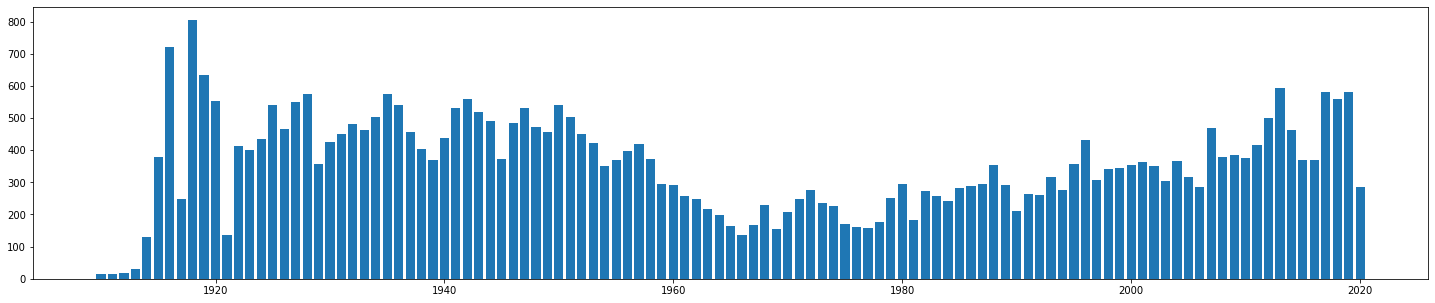

In [87]:
#year vs num of movies
year_movie_dt=movie_df['Year'].value_counts().sort_index()
keys=list(year_movie_dt.keys())
values=list(year_movie_dt.values)

plt.figure(figsize=(25,5))
plt.bar(keys,values)

In [88]:
#Dropping rows where movie title is NaN
movie_df=movie_df[movie_df['Title'].isna()==False]
movie_df['Title']

0                         An Arcadian Maid
1                         As It Is In Life
2          The Courtship of Miles Standish
3              The Englishman and the Girl
4                             The Fugitive
                       ...                
2762                         O Pitta Katha
2763      Anukunnadi Okkati Ayyandhi Okati
2764    Screenplay of an Indian Love Story
2765                                 Madha
2766                                Arjuna
Name: Title, Length: 39793, dtype: object

In [89]:
#removing a.k.a from the movie title.
movie_df['Title']=movie_df['Title'].apply(lambda x:x.split(' a.k.a. ')[-1].strip())

In [90]:
#THere are few rows which contains directors and artists in the cast column. Seperating directors.

movie_df['Director'] = movie_df['Director'].replace(np.nan, 'unknown')
print(movie_df['Director'].value_counts()[:5])

dir_list=movie_df['Cast'].apply(lambda x: x.split(';')[0].split('(')[0].strip()).values

#creating a new list of Directors
new_director_lst=[]
for dir,cast in zip(movie_df['Director'].values,dir_list):
  if dir=='unknown' and len(cast.split(','))==1:
    new_director_lst.append(cast)
  else:
    new_director_lst.append(dir) 

movie_df['Director']=new_director_lst
movie_df.tail(5)


unknown             1866
William Beaudine     150
Sam Newfield         149
Richard Thorpe       142
Allan Dwan           131
Name: Director, dtype: int64


,Title,Director,Cast,Year,Genre,Language
2762,O Pitta Katha,Chandu Muddu,Viswant DuddumpudiSanjay RaoNithya ShettyBrahmaji,2020,Romance Thriller,Telugu
2763,Anukunnadi Okkati Ayyandhi Okati,Baalu Adusumilli,Dhanya BalakrishnaKomalee PrasadSiddhi IdnaniT...,2020,unknown,Telugu
2764,Screenplay of an Indian Love Story,K L Prasad,Pragathi YadhatiVikram Shiva,2020,unknown,Telugu
2765,Madha,Srividya Basawa,Trishna MukherjeeVenkat RahulAnish KuruvillaBi...,2020,Mystery Thriller,Telugu
2766,Arjuna,Kanmani,RajasekharMaryam Zakaria,2020,unknown,Telugu


In [91]:
print(movie_df['Cast'].value_counts()[:5])
#taking only artist names in the Cast column excluding directors and Screenplay
movie_df['Cast']=movie_df['Cast'].apply(lambda x:x.split(";")[-1])

unknown              8144
Harold Lloyd           97
The Three Stooges      86
Tom and Jerry          73
Looney Tunes           46
Name: Cast, dtype: int64


In [95]:
movie_df['Cast'] = movie_df['Cast'].replace(np.nan, 'unknown')

actor_1_name=[]
actor_2_name=[]
actor_3_name=[]

for i,year,lang in zip(movie_df['Cast'].values,movie_df['Year'].values,movie_df['Language'].values):
  if (lang=='English') or (year<=2017 and lang=='Hindi') or (year<=2019 and lang=='Telugu'):
    try:
      actor_1_name.append(i.split(',')[0].strip())
    except:
      actor_1_name.append('unknown')
    try:
      actor_2_name.append(i.split(',')[1].strip())
    except:
      actor_2_name.append('unknown')
    try:
      actor_3_name.append(i.split(',')[2].strip())
    except:
      actor_3_name.append('unknown')

  else:
    try:
      actor_1_name.append(i.split(' ')[0].strip())
    except:
      actor_1_name.append('unknown')
    try:
      actor_2_name.append(i.split(' ')[1].strip())
    except:
      actor_2_name.append('unknown')
    try:
      actor_3_name.append(i.split(' ')[2].strip())
    except:
      actor_3_name.append('unknown')
  
  
movie_df['actor_1_name']=actor_1_name
movie_df['actor_2_name']=actor_2_name
movie_df['actor_3_name']=actor_3_name

print(movie_df.shape)
movie_df.head()

(39793, 9)


,Title,Director,Cast,Year,Genre,Language,actor_1_name,actor_2_name,actor_3_name
0,An Arcadian Maid,D. W. Griffith,"Mary Pickford, Mack Sennett",1910,Drama,English,Mary Pickford,Mack Sennett,unknown
1,As It Is In Life,D. W. Griffith,"George Nichols, Gladys Egan, Mary Pickford",1910,Romantic drama,English,George Nichols,Gladys Egan,Mary Pickford
2,The Courtship of Miles Standish,Hobart Bosworth,Robert Z. Leonard,1910,Drama,English,Robert Z. Leonard,unknown,unknown
3,The Englishman and the Girl,D. W. Griffith,"Charles Craig, Mary Pickford",1910,Comedy,English,Charles Craig,Mary Pickford,unknown
4,The Fugitive,D. W. Griffith,"Kate Bruce, Edward Dillon",1910,Drama,English,Kate Bruce,Edward Dillon,unknown


In [96]:
movie_df['Genre'] = movie_df['Genre'].replace(np.nan, 'unknown')
movie_df['Genre'].value_counts()

Drama                                          8752
Comedy                                         5723
Western                                        3359
Action                                         1698
Romance                                        1198
                                               ... 
Horror Thriller Drama                             1
Drama, Fantasy, Musical                           1
Sports Comedy                                     1
Crime, Horror, Mystery                            1
Adventure, Animated, Family, Fantasy-comedy       1
Name: Genre, Length: 2413, dtype: int64

In [97]:
#removing special symbols from Genre column
import re
movie_df['Genre']=movie_df['Genre'].apply(lambda x:re.sub('[^A-Za-z0-9]+', '', x))

In [98]:
#Combining Director,actors and Genre columns
movie_df['combined']=movie_df['Director']+" "+movie_df['actor_1_name']+" "+movie_df['actor_2_name']+" "+movie_df['actor_3_name']+" "+movie_df['Genre']+" "+movie_df['Language']
movie_df['combined']=movie_df['combined'].str.lower()

In [99]:
#Finally dropping rows with missing values or duplicate rows
movie_df=movie_df.dropna()
movie_df.drop_duplicates(inplace=True)
movie_df=movie_df.reset_index()
movie_df=movie_df.drop('index',axis=1)

print(movie_df.shape)
movie_df.head()

(39793, 10)


,Title,Director,Cast,Year,Genre,Language,actor_1_name,actor_2_name,actor_3_name,combined
0,An Arcadian Maid,D. W. Griffith,"Mary Pickford, Mack Sennett",1910,Drama,English,Mary Pickford,Mack Sennett,unknown,d. w. griffith mary pickford mack sennett unkn...
1,As It Is In Life,D. W. Griffith,"George Nichols, Gladys Egan, Mary Pickford",1910,Romanticdrama,English,George Nichols,Gladys Egan,Mary Pickford,d. w. griffith george nichols gladys egan mary...
2,The Courtship of Miles Standish,Hobart Bosworth,Robert Z. Leonard,1910,Drama,English,Robert Z. Leonard,unknown,unknown,hobart bosworth robert z. leonard unknown unkn...
3,The Englishman and the Girl,D. W. Griffith,"Charles Craig, Mary Pickford",1910,Comedy,English,Charles Craig,Mary Pickford,unknown,d. w. griffith charles craig mary pickford unk...
4,The Fugitive,D. W. Griffith,"Kate Bruce, Edward Dillon",1910,Drama,English,Kate Bruce,Edward Dillon,unknown,d. w. griffith kate bruce edward dillon unknow...


#Cosine Similarity

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
movie_comb=cv.fit_transform(movie_df['combined'])

In [102]:
from sklearn.neighbors import NearestNeighbors
near_neigh=NearestNeighbors(metric='cosine',algorithm='brute')
near_neigh.fit(movie_comb)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

###Hollywood Recomendations

In [107]:
ind=movie_df[movie_df['Title']=='Interstellar'].index[0]

distance,index=near_neigh.kneighbors(movie_comb[ind],n_neighbors=11)
distance=distance.ravel()
index=index.ravel()

for i in range(len(distance)):
  if i==0:
    print('Top {} Similar movies to {} are :'.format(len(distance)-1,movie_df['Title'][index[i]]))
  else:
    print("{}. {} with a distance of {}".format(i,movie_df['Title'][index[i]],np.round(distance[i],2)))

Top 10 Similar movies to Interstellar are :
1. Inception with a distance of 0.23
2. The Dark Knight Rises with a distance of 0.31
3. Insomnia with a distance of 0.31
4. The Dark Knight with a distance of 0.31
5. Terminator Salvation with a distance of 0.36
6. Super 8 with a distance of 0.36
7. The Box with a distance of 0.38
8. A.I. Artificial Intelligence with a distance of 0.38
9. The Spirit with a distance of 0.38
10. Solaris with a distance of 0.38


In [126]:
ind=movie_df[movie_df['Title']=='Avatar'].index[0]

distance,index=near_neigh.kneighbors(movie_comb[ind],n_neighbors=11)
distance=distance.ravel()
index=index.ravel()

for i in range(len(distance)):
  if i==0:
    print('Top {} Similar movies to {} are :'.format(len(distance)-1,movie_df['Title'][index[i]]))
  else:
    print("{}. {} with a distance of {}".format(i,movie_df['Title'][index[i]],np.round(distance[i],2)))

Top 10 Similar movies to Avatar are :
1. Titanic 3D with a distance of 0.08
2. Highway with a distance of 0.15
3. We're Only Human with a distance of 0.15
4. Tyson with a distance of 0.15
5. Waiting for Forever with a distance of 0.15
6. Grace Is Gone with a distance of 0.15
7. Fargo Express with a distance of 0.15
8. Welcome Home with a distance of 0.15
9. We Bought a Zoo with a distance of 0.15
10. Jason X with a distance of 0.15


###Bollywood Recomendations

In [ ]:
ind=movie_df[movie_df['Title']=='Aashiqui 2'].index[0]

distance,index=near_neigh.kneighbors(movie_comb[ind],n_neighbors=11)
distance=distance.ravel()
index=index.ravel()

for i in range(len(distance)):
  if i==0:
    print('Top {} Similar movies to {} are :'.format(len(distance)-1,movie_df['Title'][index[i]]))
  else:
    print("{}. {} with a distance of {}".format(i,movie_df['Title'][index[i]],np.round(distance[i],2)))

Top 10 Similar movies to Aashiqui 2 are :
1. Ok Jaanu with a distance of 0.36
2. Half Girlfriend with a distance of 0.54
3. Ek Villain with a distance of 0.54
4. Fitoor with a distance of 0.58
5. Sapne Sajan Ke with a distance of 0.63
6. Yeh Jawaani Hai Deewani with a distance of 0.65
7. Prem Rog with a distance of 0.66
8. Gori Tere Pyaar Mein with a distance of 0.67
9. Yeh Vaada Raha with a distance of 0.68
10. Aithe Enti with a distance of 0.69


In [ ]:
ind=movie_df[movie_df['Title']=='Fukrey Returns'].index[0]

distance,index=near_neigh.kneighbors(movie_comb[ind],n_neighbors=11)
distance=distance.ravel()
index=index.ravel()

for i in range(len(distance)):
  if i==0:
    print('Top {} Similar movies to {} are :'.format(len(distance)-1,movie_df['Title'][index[i]]))
  else:
    print("{}. {} with a distance of {}".format(i,movie_df['Title'][index[i]],np.round(distance[i],2)))

Top 10 Similar movies to Fukrey Returns are :
1. Fukrey with a distance of 0.3
2. Baat Bann Gayi with a distance of 0.62
3. Bangistan with a distance of 0.66
4. Bittoo Boss with a distance of 0.68
5. Sonali Cable with a distance of 0.7
6. O Teri with a distance of 0.7
7. Dolly Ki Doli with a distance of 0.7
8. Bobby Jasoos with a distance of 0.7
9. Bhanwarey with a distance of 0.71
10. Afsar with a distance of 0.71


###Tollywood Recomendations

In [138]:
ind=movie_df[movie_df['Title']=='Temper'].index[0]

distance,index=near_neigh.kneighbors(movie_comb[ind],n_neighbors=11)
distance=distance.ravel()
index=index.ravel()

for i in range(len(distance)):
  if i==0:
    print('Top {} Similar movies to {} are :'.format(len(distance)-1,movie_df['Title'][index[i]]))
  else:
    print("{}. {} with a distance of {}".format(i,movie_df['Title'][index[i]],np.round(distance[i],2)))

Top 10 Similar movies to Temper are :
1. Businessman with a distance of 0.33
2. Pokiri with a distance of 0.43
3. Baadshah with a distance of 0.5
4. Andhrawala with a distance of 0.5
5. Simha Baludu with a distance of 0.52
6. Singham with a distance of 0.52
7. Devudu Chesina Manushulu with a distance of 0.52
8. Vinavayya Ramayya with a distance of 0.54
9. KD No:1 with a distance of 0.55
10. Stree Janma with a distance of 0.55


In [141]:
ind=movie_df[movie_df['Title']=='Kotha Bangaru Lokam'].index[0]

distance,index=near_neigh.kneighbors(movie_comb[ind],n_neighbors=11)
distance=distance.ravel()
index=index.ravel()

for i in range(len(distance)):
  if i==0:
    print('Top {} Similar movies to {} are :'.format(len(distance)-1,movie_df['Title'][index[i]]))
  else:
    print("{}. {} with a distance of {}".format(i,movie_df['Title'][index[i]],np.round(distance[i],2)))

Top 10 Similar movies to Kotha Bangaru Lokam are :
1. Priyudu with a distance of 0.37
2. Mukunda with a distance of 0.4
3. Vinavayya Ramayya with a distance of 0.52
4. Lucky with a distance of 0.52
5. Charminar with a distance of 0.52
6. Mana Oori Ramayanam with a distance of 0.54
7. Ulavacharu Biryani with a distance of 0.54
8. Dhoni with a distance of 0.54
9. Kalavar King with a distance of 0.55
10. Ee Varsham Sakshiga with a distance of 0.55


In [145]:
ind=movie_df[movie_df['Title']=='Venky'].index[0]

distance,index=near_neigh.kneighbors(movie_comb[ind],n_neighbors=11)
distance=distance.ravel()
index=index.ravel()

for i in range(len(distance)):
  if i==0:
    print('Top {} Similar movies to {} are :'.format(len(distance)-1,movie_df['Title'][index[i]]))
  else:
    print("{}. {} with a distance of {}".format(i,movie_df['Title'][index[i]],np.round(distance[i],2)))

Top 10 Similar movies to Venky are :
1. Dubai Seenu with a distance of 0.41
2. Nee Kosam with a distance of 0.41
3. Amar Akbar Anthony with a distance of 0.44
4. Bhadra with a distance of 0.47
5. Chanti with a distance of 0.5
6. Simha with a distance of 0.53
7. Neninthe with a distance of 0.53
8. Nippu with a distance of 0.53
9. Vikramarkudu with a distance of 0.53
10. Andarivadu with a distance of 0.53
